In [179]:
import numpy as np,  pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [180]:
plantas = pd.read_excel('plantas_intermitentes_clean.xlsx', header=1)
plantas.head()

,Unnamed: 0,dia_semana,fecha,hora,GICIE301,GICIE302,GICIE303,GICIE304,GICIE305,GICIS306,...,GICIS308,GICIS309,GICIS310,GICIS311,GICIS312,GICIS313,GICIS314,GICIS315,GICIS316,fecha_hora
0,1,jueves,2013-11-14,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 01:00:00
1,2,jueves,2013-11-14,2,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 02:00:00
2,3,jueves,2013-11-14,3,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 03:00:00
3,4,jueves,2013-11-14,4,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 04:00:00
4,5,jueves,2013-11-14,5,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 05:00:00


In [181]:
plantas.tail()

,Unnamed: 0,dia_semana,fecha,hora,GICIE301,GICIE302,GICIE303,GICIE304,GICIE305,GICIS306,...,GICIS308,GICIS309,GICIS310,GICIS311,GICIS312,GICIS313,GICIS314,GICIS315,GICIS316,fecha_hora
46819,46820,lunes,2019-03-18,20,31368,36054.0,51098.0,80381.0,108298.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 20:00:00
46820,46821,lunes,2019-03-18,21,31368,106540.0,78322.0,62865.0,91574.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 21:00:00
46821,46822,lunes,2019-03-18,22,45247,103049.0,75092.0,61188.0,57110.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 22:00:00
46822,46823,lunes,2019-03-18,23,25575,92652.0,80384.0,60256.0,29338.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 23:00:00
46823,46824,lunes,2019-03-18,24,6344,120661.0,83692.0,35103.0,13816.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-19 00:00:00


In [182]:
data = plantas.GICIS306.dropna()
data.head()

32544    0.0
32545    0.0
32546    0.0
32547    0.0
32548    0.0
Name: GICIS306, dtype: float64

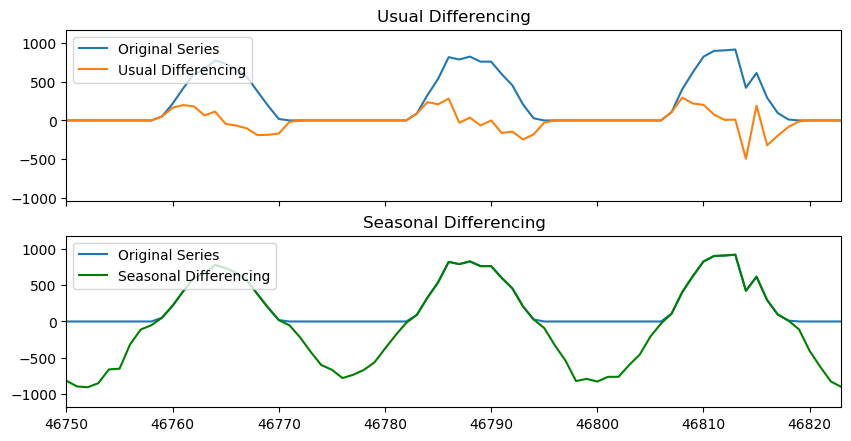

In [183]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.xlim(46750,46823)
plt.show()

In [203]:
data = plantas.GICIS306.dropna()
end = len(data)
data = data[13500:end-]
data.tail()

46771    0.0
46772    0.0
46773    0.0
46774    0.0
46775    0.0
Name: GICIS306, dtype: float64

In [185]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel_06 = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=2, max_q=2, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=8371.463, BIC=8394.360, Time=2.905 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=True); AIC=11279.071, BIC=11288.230, Time=0.054 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 12) (constant=True); AIC=7612.100, BIC=7630.417, Time=3.736 seconds
Near non-invertible roots for order (1, 0, 0)(1, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=9830.723, BIC=9849.040, Time=2.412 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=False); AIC=11277.072, BIC=11281.651, Time=0.038 seconds
Fit ARIMA: (1, 0, 1)x(0, 1, 0, 12) (constant=True); AIC=9139.829, BIC=9158.146, Time=0.517 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 1, 12) (cons

In [186]:
smodel_06.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  732
Model:             SARIMAX(1, 0, 1)x(2, 1, 1, 12)   Log Likelihood               -3729.875
Date:                            Sun, 08 Mar 2020   AIC                           7473.750
Time:                                    22:42:55   BIC                           7505.805
Sample:                                         0   HQIC                          7486.125
                                            - 732                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.4009      2.585     -0.542      0.588      -6.468       3.667
ar.L1          0.7872      0.020     38.847      0.000       0.747       0.827
ma.L1         -0.2540      0.026     -9.720      0.000      -0.305      -0.203
ar.S.L12      -1.6180      0.027    -59.426      0.000      -1.671      -1.565
ar.S.L24      -0.6180      0.027    -22.745      0.000      -0.671      -0.565
ma.S.L12       0.9599      0.024     40.354      0.000       0.913       1.007
sigma2      1694.3869     37.837     44.781      0.000    1620.227    1768.546
===================================================================================
Ljung-Box (Q):                      176.32   Jarque-Bera (JB):             11750.08
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.57   Skew:                            -0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [204]:
n_periods = 24
fitted, confint = smodel_06.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(data), len(data)+n_periods)

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

In [205]:
data, fitted_series

(46044    890.0
 46045    868.0
 46046    762.0
 46047    635.0
 46048    418.0
          ...  
 46771      0.0
 46772      0.0
 46773      0.0
 46774      0.0
 46775      0.0
 Name: GICIS306, Length: 732, dtype: float64, 732      9.728850
 733    -13.883905
 734    -16.466096
 735    -18.054096
 736    -15.479433
 737      4.919556
 738      7.417620
 739     59.572610
 740    248.281489
 741    467.072692
 742    654.745433
 743    723.664947
 744    811.168963
 745    770.802666
 746    698.560745
 747    590.375295
 748    393.936019
 749    192.515261
 750     18.970179
 751     -2.491812
 752    -18.999997
 753    -32.688045
 754    -37.339434
 755    -40.668080
 dtype: float64)

In [206]:
data = plantas.GICIS306.dropna()
data = data[13500:]

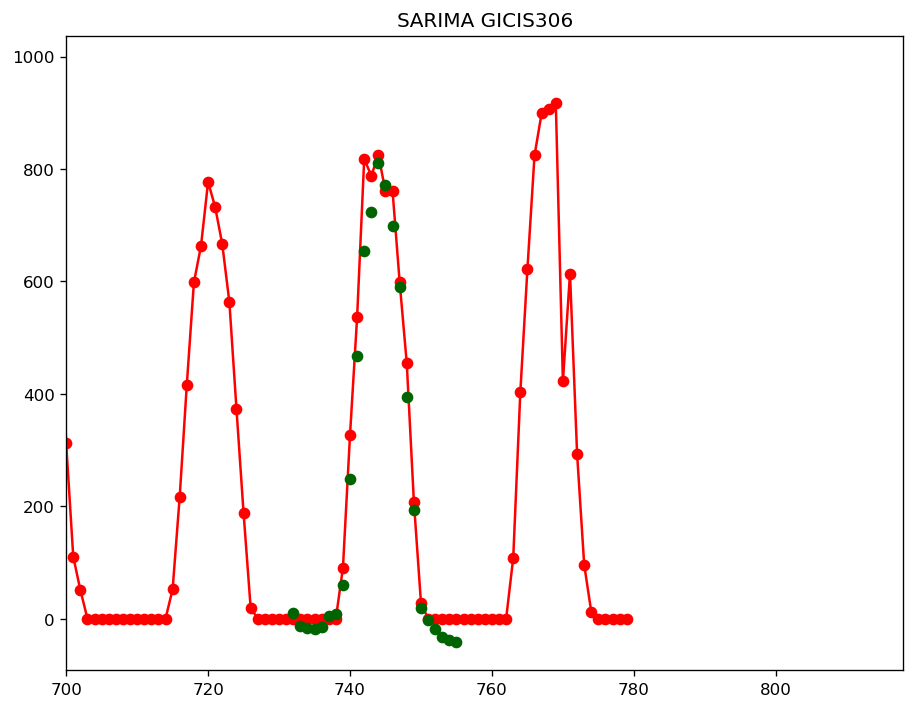

In [208]:
# Plot
data.index = np.arange(0,780)
plt.plot(data,'o-',color='r')
plt.plot(fitted_series,'o', color='darkgreen')
plt.title("SARIMA GICIS306")
plt.xlim(700)
plt.show()

In [191]:
data.index = np.arange(0,len(data))

In [192]:
data = data[-24:]
data.index = np.arange(0,24)
data

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7     108.0
8     403.0
9     622.0
10    824.0
11    899.0
12    906.0
13    917.0
14    422.0
15    614.0
16    293.0
17     96.0
18     12.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
Name: GICIS306, dtype: float64

In [193]:
fitted_series.index = np.arange(0,24)
fitted_series

0       9.728850
1     -13.883905
2     -16.466096
3     -18.054096
4     -15.479433
5       4.919556
6       7.417620
7      59.572610
8     248.281489
9     467.072692
10    654.745433
11    723.664947
12    811.168963
13    770.802666
14    698.560745
15    590.375295
16    393.936019
17    192.515261
18     18.970179
19     -2.491812
20    -18.999997
21    -32.688045
22    -37.339434
23    -40.668080
dtype: float64

In [196]:
per = np.abs((fitted_series-data)/data)
per

0          inf
1          inf
2          inf
3          inf
4          inf
5          inf
6          inf
7     0.448402
8     0.383917
9     0.249079
10    0.205406
11    0.195033
12    0.104670
13    0.159430
14    0.655357
15    0.038477
16    0.344492
17    1.005367
18    0.580848
19         inf
20         inf
21         inf
22         inf
23         inf
dtype: float64

In [197]:
np.mean(per[7:19])

0.3642065385406131